## Assignment - 2
### Name : Limalka Sadith
### Index No : 190538N

### Question 1

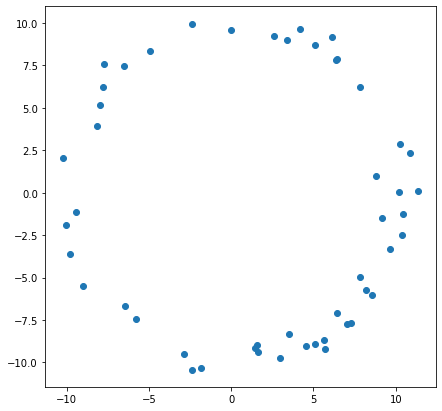

In [1]:
import numpy as np 
from scipy.optimize import minimize 
from scipy import linalg 
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize = (7,7))
N = 100 
half_n = N//2 
r = 10 
s = r/16 
t = np.random. uniform (0 , 2*np . pi,half_n ) 
n = s*np.random. randn ( half_n ) 
x , y = ( r + n)*np . cos (t),( r + n)*np . sin ( t )

ax.scatter(x,y)
plt.show()


In [ ]:
def RANSAC_circle(x_data, y_data, n):
	d_min = 99999
	best_circle = []
	best_sample = []

	for _ in range(n):
		sample = []
		save_ran = []
		

		# get three points from data
		i = 0
		while True:
			ran = np.random.randint(len(x_data))
			if ran not in save_ran:
				sample.append((x_data[ran], y_data[ran]))
				save_ran.append(ran)
				i += 1
			if i == 3:
				break


		# calculate A, B, C value from three points by using matrix

		pt1 = sample[0]
		pt2 = sample[1]
		pt3 = sample[2]

		A = np.array([[pt2[0] - pt1[0], pt2[1] - pt1[1]], [pt3[0] - pt2[0], pt3[1] - pt2[1]]]) 
		B = np.array([[pt2[0]**2 - pt1[0]**2 + pt2[1]**2 - pt1[1]**2], [pt3[0]**2 - pt2[0]**2 + pt3[1]**2 - pt2[1]**2]])		
		inv_A = inv(A)

		c_x, c_y = np.dot(inv_A, B) / 2
		c_x, c_y = c_x[0], c_y[0]
		r = np.sqrt((c_x - pt1[0])**2 + (c_y - pt1[1])**2)


		d = 0
		for i in range(len(x_data)):
			dis = np.sqrt((x_data[i]-c_x)**2 + (y_data[i]-c_y)**2)

			# if abs(dis-r) < 5:
			# 	d += abs(dis-r)
			if dis >= r:
				d += dis - r
			else:
				d += r - dis
		
		# a, b, = c_x,c_y
		# x_sample, y_sample = [i[0] for i in sample],[i[1] for i in sample]
		# ax.scatter(x_sample, y_sample, c='r', marker='o', label='data')
		# circle = plt.Circle((a, b), radius=r, color='m', fc='y', fill=False)
		# ax.add_artist(circle)


		if d_min > d:
			d_min = d
			best_circle = [c_x, c_y, r]
			best_sample = sample.copy()

	return best_circle,best_sample


fig,ax = plt.subplots(figsize=(5,5))
ax.scatter(x,y)

circle, sample = RANSAC_circle(x,y,10)
a, b, r = circle
x_sample, y_sample = [i[0] for i in sample],[i[1] for i in sample]


ax.scatter(x_sample, y_sample, c='r', marker='o', label='data')

circle = plt.Circle((a, b), radius=r, color='b', fc='y', fill=False)
# ax.gca().add_patch(circle)
ax.add_artist(circle)
ax.axis('scaled')
# ax.legend()
plt.show()


In [4]:
import matplotlib.pyplot as plt
import numpy as np

[[150 200]
 [120 450]
 [500 250]
 [470 450]]


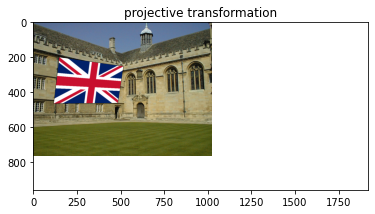

In [6]:
img = imread('001.jpg')
# img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
# imshow(img)

# flag = cv.imread('flag.png',cv.IMREAD_COLOR)
flag = imread('flag.png')
# imshow(flag)

#source coordinates
src = np.array([0, 0, 
                0, 900,
                1800, 0,
                1800, 900,]).reshape((4, 2))
#destination coordinates
dst = np.array([150, 200, 
                120, 450,
                500,250,
                470, 450,]).reshape((4, 2))
print(dst)
#using skimage’s transform module where ‘projective’ is our desired parameter
tform = transform.estimate_transform('projective', src, dst)
tf_img = transform.warp(flag, tform.inverse)
#plotting the transformed image
fig, ax = plt.subplots()
# dest = cv.addWeighted(tf_img, 1, img, 1, 0.0)
# print(img[0],tf_img[0])
ax.imshow(img)
ax.imshow(tf_img)
# ax.imshow(dest)
_ = ax.set_title('projective transformation')

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

dst1 = cv.imread("banner_1.jpg")
dst2 = cv.imread("banner_2.jpg")
dst3 = cv.imread("harvard.jpeg")

# Four corners in the destination image
pts_dst1 = np.array([[117, 233], [94, 536], [539, 307],[536, 542]])
pts_dst2 = np.array([[99, 42], [254, 91], [32, 316], [277, 322]])
pts_dst3 = np.array([[192, 82], [470, 69], [189, 222], [470, 216]])

src1 = cv.imread("flower.jpg")
src2 = cv.imread("iron.jpg")
src3 = cv.imread("all_blacks.jpg")

# Four corners in the source image.
pts_src1 = np.array([[0, 0], [0, 958], [1919, 0],[1919, 958]])
pts_src2 = np.array([[0, 0], [959, 0], [0, 640], [959, 640]])
pts_src3 = np.array([[0, 0], [1199, 0], [0, 674], [1199, 674]])

# Calculate Homography
h1, status1 = cv.findHomography(pts_src1, pts_dst1)
h2, status2 = cv.findHomography(pts_src2, pts_dst2)
h3, status3 = cv.findHomography(pts_src3, pts_dst3)

# Warp source image to destination based on homography
img_out1 = cv.warpPerspective(src1, h1, (dst1.shape[1],dst1.shape[0]))
img_out2 = cv.warpPerspective(src2, h2, (dst2.shape[1],dst2.shape[0]))
img_out3 = cv.warpPerspective(src3, h3, (dst3.shape[1],dst3.shape[0]))

# fig,ax=plt.subplots(3,3,figsize=(15,10))

def f(src, dst, pts_src, pts_dst):
    h1, _ = cv.findHomography(pts_src, pts_dst)
    img_out = cv.warpPerspective(src, h1, (dst.shape[1],dst.shape[0]))

    fig,ax = plt.subplots(figsize=(15,10))
    ax.imshow(cv.cvtColor(src, cv.COLOR_BGR2RGB))
    ax.set_title("Source Image")
    ax.axis("off")
    ax.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))
    ax.set_title("Destination Image")
    ax.axis("off")
    ax.imshow(cv.cvtColor(img_out, cv.COLOR_BGR2RGB))
    ax.set_title("Image Warped")
    ax.axis("off")

f(src1, dst1, pts_src1, dst1)
# ax[0][0].imshow(cv.cvtColor(src1,cv.COLOR_BGR2RGB))
# ax[0][0].set_title("Source Image")
# ax[0][0].axis("off")
# ax[0][1].imshow(cv.cvtColor(dst1,cv.COLOR_BGR2RGB))
# ax[0][1].set_title("Destination Image")
# ax[0][1].axis("off")
# ax[0][2].imshow(cv.cvtColor(img_out1,cv.COLOR_BGR2RGB))
# ax[0][2].set_title("Image Warped")
# ax[0][2].axis("off")

# ax[1][0].imshow(cv.cvtColor(src2,cv.COLOR_BGR2RGB))
# ax[1][0].set_title("Source Image")
# ax[1][0].axis("off")
# ax[1][1].imshow(cv.cvtColor(dst2,cv.COLOR_BGR2RGB))
# ax[1][1].set_title("Destination Image")
# ax[1][1].axis("off")
# ax[1][2].imshow(cv.cvtColor(img_out2,cv.COLOR_BGR2RGB))
# ax[1][2].set_title("Image Warped")
# ax[1][2].axis("off")

# ax[2][0].imshow(cv.cvtColor(src3,cv.COLOR_BGR2RGB))
# ax[2][0].set_title("Source Image")
# ax[2][0].axis("off")
# ax[2][1].imshow(cv.cvtColor(dst3,cv.COLOR_BGR2RGB))
# ax[2][1].set_title("Destination Image")
# ax[2][1].axis("off")
# ax[2][2].imshow(cv.cvtColor(img_out3,cv.COLOR_BGR2RGB))
# ax[2][2].set_title("Image Warped")
# ax[2][2].axis("off")


plt.show()